In [1]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output

In [2]:
env = gym.make("FrozenLake-v0")

In [3]:
action_space_size =  env.action_space.n
state_space_size = env.observation_space.n

print(state_space_size,action_space_size)

16 4


In [4]:
q_table = np.zeros((state_space_size,action_space_size))

# Parameters

In [5]:
num_episodes = 25000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

In [6]:

rewards_all_episodes = []

# Q-Learning Algorithm
for episode in range(num_episodes):
    
    state = env.reset()
    done = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        #env.render()
        
        # Exploration-exploitation trade-off
        uniform_random_variable= random.uniform(0,1)
        if(uniform_random_variable > exploration_rate):
            #if we are exploiting,
            #we use the action that has the highest 
            #value in our q_table at that state
            action = np.argmax(q_table[state,:])
        else:
            #other wise explore randomly
            action = env.action_space.sample()
            
        new_state, reward, done, info = env.step(action)
        
        # Update Q-table for Q(s,a)
        q_table[state][action] =  q_table[state][action] * (1-learning_rate) + \
            learning_rate * (reward + discount_rate*np.max(q_table[new_state, :]))
        
        state = new_state
        rewards_current_episode += reward
        
        if(done):
            break
            
    #Decay the exploration rate after each loop
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    
    rewards_all_episodes.append(rewards_current_episode)

In [7]:
import matplotlib.pyplot as plt
#average every 1000 episodes
average =  [sum(rewards_all_episodes[1000*k:1000*(k+1)])/1000 for k in range(int(len(rewards_all_episodes)/1000))]
print(average)

[0.052, 0.223, 0.429, 0.58, 0.629, 0.652, 0.691, 0.7, 0.71, 0.686, 0.683, 0.665, 0.686, 0.663, 0.683, 0.689, 0.663, 0.692, 0.675, 0.705, 0.689, 0.687, 0.711, 0.67, 0.687]


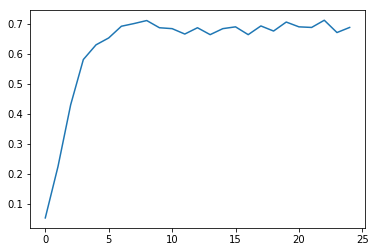

In [8]:
plt.plot(average)

In [9]:
print("Best", average[-1])

Best 0.687


In [10]:
#watch it in action

In [11]:
for episode in range(10):
    env.reset()
    print("Episode: %d"%episode)
    
    done = False
    
    for step in range(max_steps_per_episode):
        clear_output(wait=True)
        env.render()

        action = np.argmax(q_table[state])

        state,reward,done,info = env.step(action)
        if(done):
            break
        time.sleep(.5)

  (Left)
SFFF
FHFH
FFFH
HFFG


KeyboardInterrupt: 